https://www.physik.uni-bielefeld.de/didaktik/Lehrerinnen/Workshops/TI.Voyage/Veroeffentlichungen/AufzugMNU.pdf
https://mascil.ph-freiburg.de/aufgabensammlung/experimente-mit-dem-smartphone/gruppe-2-experimente-mit-dem-beschleunigungssensor
https://blogs.hu-berlin.de/didaktikdigital/2016/11/20/zurckgelegter-weg-einer-fahrstuhlfahrt-mit-handysensorik/
https://github.com/PabRod/elevator-tool

# Auswertung der Beschleunigungsmessung eines Aufzuges

***Was passiert, Kontext?***
Ziel: 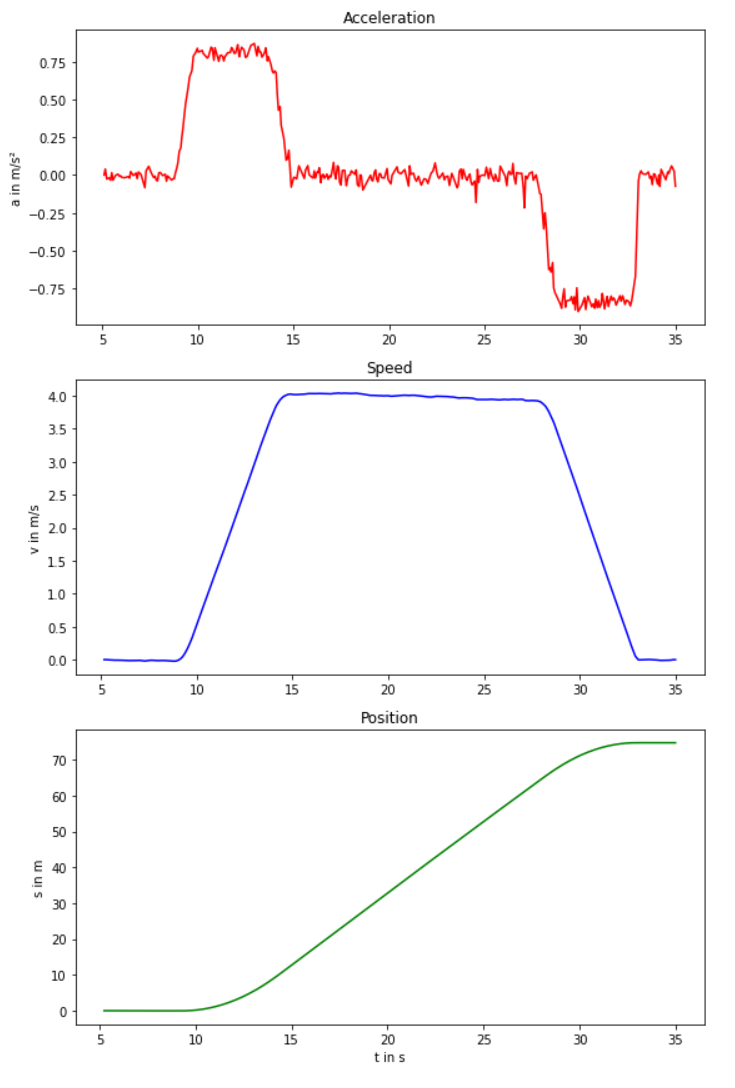

## Einlesen der Daten

Die Messdaten sind in einem üblichen Format als *comma-seperated values* (CSV) abgespeichert. 


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('data/skyscrapper_up.csv')

## Visualisieren der Daten
Anzeigen der ersten Zeilen der Daten: *Verwende dazu den Befehl `data.head()`*

In [ ]:
data.head()

In [ ]:
data.info() 

In [ ]:
data.describe()

Entferne alle Werte, die keine Zahl (NaN) sind

In [ ]:
data=data.dropna()

Plot der einzelnen Beschleunigungen über die Zeit

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(data['relative_time'],data['AccX'],label='AccX')
plt.plot(data['relative_time'],data['AccY'],label='AccY')
plt.plot(data['relative_time'],data['AccZ'],label='AccZ')
plt.legend()

## Vorbereitung der Daten
Offensichtlich wurde auch der Vorgang des Hinlegens und Wegnehmens des Messgerätes protokolliert - diese Messpunkte am Anfang und Ende dürfen nicht mit betrachtet werden. Darüber hinaus ist ersichtlich, dass die $z$-Komponente der Beschleunigung während der Bewegung des Aufzuges die einzige von 0 verschiedene Komponente ist. Es genügt also, sich im Folgenden mit dieser Komponente zu beschäftigen.

Die Zeit-Achse ist offensichtlich nicht in Sekunden eingeteilt, ein Blick in die Dokumentation verrät, dass die Zeit in $\mathrm{ms}$ gemessen wurde.

Erstellen einer Zeit-Spalte mit korrekten Zeitpunkten:

In [ ]:
data['time']=data['relative_time']/1000

In [ ]:
data.head()

In [ ]:
plt.plot(data['time'],data['AccZ'],label='AccZ')
plt.xlabel('t in s')
plt.ylabel('a in m/s²')
plt.legend()

Jetzt betrachten wir nur die Messdaten zwischen Sekunde 5 und Sekunde 35:

In [ ]:
data_red=data[(5<=data['time']) & (data['time']<=35)]

In [ ]:
plt.plot(data['time'],data['AccZ'],label='AccZ')
plt.plot(data_red['time'],data_red['AccZ'],label='AccZ_red')
plt.xlabel('t in s')
plt.ylabel('a in m/s²')
plt.legend()

In [ ]:
plt.plot(data_red['time'],data_red['AccZ'],label='AccZ')
plt.xlabel('t in s')
plt.ylabel('a in m/s²')
plt.legend()

**Optional**: Offensichtlich beträgt die gemessene Beschleunigung im Zustand der gleichförmigen Bewegung nicht den erwarteten Wert von $g=9.81\,\mathrm{\frac{m}{s^2}}$.

Dieser Offset in der Messung lässt sich prinzipiell korrigieren, indem der Mittelwert über die Messung gebildet wird und der bestimmte Offset abgezogen wird.

In [ ]:
g_ex=data_red['AccZ'].mean()
g_ex

In [ ]:
abw=g_ex-9.81
abw

Füge jetzt eine neue Spalte mit den angepassten Werten zu data_red hinzu.

In [ ]:
data_red['AccZ_korr']=data_red['AccZ']-abw
data_red.head()

In [ ]:
plt.plot(data_red['time'],data_red['AccZ_korr'],label='AccZ_korr')
plt.hlines(9.81,5,35,color='red',label='$g=9.81\,m/s^2$')
plt.xlabel('t in s')
plt.ylabel('a in m/s²')
plt.legend()

## Auswertung der Daten
Jetzt scheinen die Daten gut zu passen und wir können mit der eigentlichen Auswertung fortfahren.

Aus der gemessenen Beschleunigung $a(t)$ können wir die Geschwindigkeit $v(t)$ und den ort bzw. Weg $s(t)$ durch Integration bestimmen:
$$v(t)=\int_{t_0}^t a(s)ds$$
$$s(t)=\int_{t_0}^tv(s)ds$$

In [ ]:
from scipy import integrate
import numpy as np

Für die Aufzugbewegung sind nur die Abteile der Beschleunigung über bzw. unter dem Wert von $g=9.81\,\mathrm{\frac{m}{s^2}}$ relevant. Im Folgenden wird also mit *Beschl-g* weiergerechnet.

In [ ]:
g=9.81

In [ ]:
v=integrate.cumtrapz(data_red['AccZ_korr']-g,data_red['time'])

In [ ]:
plt.plot(data_red['time'][1:],v) #Beim integrieren nimmt verringert sich die Länge des Vektors um 1 -> Darum wird hier der erste Zeitpunkt weggelassen.
plt.xlabel('t in s')
plt.ylabel('v in m/s')

In [ ]:
s=integrate.cumtrapz(v,data_red['time'][1:])

In [ ]:
plt.plot(data_red['time'][2:],s)
plt.xlabel('t in s')
plt.ylabel('s in m')

In [ ]:
fig = plt.figure()
plt.subplot(311)
plt.title('Acceleration')
plt.plot(data_red['time'], data_red['AccZ_korr']-g, color='red')
plt.ylabel('a in m/s²')

plt.subplot(312)
plt.title('Speed')
plt.plot(data_red['time'][1:], v, color='blue')
plt.ylabel('v in m/s')

plt.subplot(313)
plt.title('Position')
plt.plot(data_red['time'][2:], s, color='green')
plt.ylabel('s in m')

plt.xlabel('t in s');
fig.tight_layout()

Passe die Größe der Abbildung an und speichere die Abbildung

In [ ]:
fig = plt.figure(figsize=(8, 12))
plt.subplot(311)
plt.title('Acceleration')
plt.plot(data_red['time'], data_red['AccZ_korr']-g, color='red')
plt.ylabel('a in m/s²')

plt.subplot(312)
plt.title('Speed')
plt.plot(data_red['time'][1:], v, color='blue')
plt.ylabel('v in m/s')

plt.subplot(313)
plt.title('Position')
plt.plot(data_red['time'][2:], s, color='green')
plt.ylabel('s in m')

plt.xlabel('t in s');
fig.tight_layout()

plt.savefig('Aufzug_Ausw.png')